In [ ]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = '/content/drive/MyDrive/Pic'
labels = '/content/drive/MyDrive/Color_label'


from PIL import Image
import os, os.path

imgs = []
path = "/content/drive/MyDrive/Pic"
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(path):
    imgs.append(Image.open(os.path.join(path,f)))


labels = []
path = "/content/drive/MyDrive/Color_label"
valid_images = [".jpg",".gif",".png",".tga"]
for f in os.listdir(path):
    labels.append(Image.open(os.path.join(path,f)))


print()

In [ ]:
import cv2
import glob
import numpy as np

X_data = []
files = glob.glob ("/content/drive/MyDrive/Pic/*.png")
for myFile in files:
    print(myFile)
    image = cv2.imread (myFile)
    X_data.append (image)

print('X_data shape:', np.array(X_data).shape)



/content/drive/MyDrive/Pic/mexico-earthquake_00000132_post_disaster.png
/content/drive/MyDrive/Pic/mexico-earthquake_00000140_post_disaster.png
/content/drive/MyDrive/Pic/mexico-earthquake_00000186_post_disaster.png
/content/drive/MyDrive/Pic/mexico-earthquake_00000030_post_disaster.png
/content/drive/MyDrive/Pic/mexico-earthquake_00000129_post_disaster.png
/content/drive/MyDrive/Pic/mexico-earthquake_00000160_post_disaster.png
/content/drive/MyDrive/Pic/mexico-earthquake_00000070_post_disaster.png
/content/drive/MyDrive/Pic/mexico-earthquake_00000192_post_disaster.png
/content/drive/MyDrive/Pic/mexico-earthquake_00000142_post_disaster.png
/content/drive/MyDrive/Pic/mexico-earthquake_00000011_post_disaster.png
/content/drive/MyDrive/Pic/mexico-earthquake_00000114_post_disaster.png
/content/drive/MyDrive/Pic/mexico-earthquake_00000184_post_disaster.png
/content/drive/MyDrive/Pic/mexico-earthquake_00000173_post_disaster.png
/content/drive/MyDrive/Pic/mexico-earthquake_00000007_post_disas

<class 'numpy.ndarray'>


# New section

In [ ]:
def conv2d_block(input_tensor,n_filters,kernel_size=3):
  x=input_tensor
  for i in range(2):
    x=tf.keras.layers.Conv2D(filters=n_filters,kernel_size=(kernel_size,kernel_size),padding='same')(x)
    x=tf.keras.layers.Activation('relu')(x)
  return x

In [ ]:
def encoder_block(inputs,n_filter,pool_size,dropout):
  f=conv2d_block(input_tensor=inputs,n_filters=n_filter)
  p=tf.keras.layers.MaxPooling2D(pool_size)(f)
  p=tf.keras.layers.Dropout(dropout)(p)
  return f,p

In [ ]:
def encoder(inputs):
  f1,p1=encoder_block(inputs,n_filter=64,pool_size=(2,2),dropout=0.3)
  f2,p2=encoder_block(p1,n_filter=128,pool_size=(2,2),dropout=0.3)
  f3,p3=encoder_block(p2,n_filter=256,pool_size=(2,2),dropout=0.3)
  f4,p4=encoder_block(p3,n_filter=512,pool_size=(2,2),dropout=0.3)
  return p4,(f1,f2,f3,f4)

In [ ]:
def bottleneck(inputs):
  bottle_neck=conv2d_block(inputs,n_filters=1024)
  return bottle_neck

In [ ]:
def decoder_block(inputs,conv_output,n_filter,kernel_size,strides,dropout):
  u=tf.keras.layers.Conv2DTranspose(n_filter,kernel_size,strides=strides,padding='same')(inputs)
  c=tf.keras.layers.concatenate([u,conv_output])
  c = tf.keras.layers.Dropout(dropout)(c)
  c=conv2d_block(c,n_filter,kernel_size=3)
  return c

In [ ]:
def decoder(inputs,convs):
  f1,f2,f3,f4=convs
  c6=decoder_block(inputs,f4,n_filter=512,kernel_size=(3,3),strides=(2,2),dropout=0.3)
  c7=decoder_block(c6,f3,n_filter=256,kernel_size=(3,3),strides=(2,2),dropout=0.3)
  c8=decoder_block(c7,f2,n_filter=128,kernel_size=(3,3),strides=(2,2),dropout=0.3)
  c9=decoder_block(c8,f1,n_filter=64,kernel_size=(3,3),strides=(2,2),dropout=0.3)
  outputs=tf.keras.layers.Conv2D(1,kernel_size=(1,1),activation='relu')(c9)
  return outputs

In [ ]:
def unet():
  inputs=tf.keras.layers.Input(shape=(80,160,3,))
  encoder_output,convs=encoder(inputs)
  bottle_neck=bottleneck(encoder_output)
  outputs=decoder(bottle_neck,convs)
  model=tf.keras.Model(inputs=inputs,outputs=outputs)
  return model

In [ ]:
import shapely

In [ ]:
from shapely.wkt import dumps, loads
from shapely.geometry import Polygon

In [ ]:
POLYGON = Polygon([(1022.975467185924, 739.2521401796066), (1005.679622937569, 747.3688275618451), (999.4269058143009, 744.4378664097038), (998.4499187631066, 741.7023026698211), (987.312266386992, 747.1734301524717), (975.9792166006625, 722.7487538884745), (1022.975464541918, 703.2434419004524), (1022.975467185924, 739.2521401796066)])

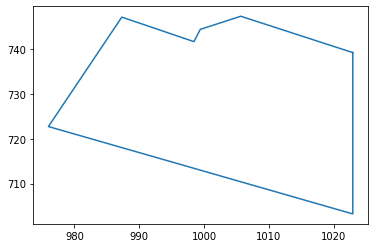

In [ ]:
import matplotlib.pyplot as plt
x,y = POLYGON.exterior.xy
plt.plot(x,y)
plt.savefig('/content/drive/MyDrive/plot.png')

In [ ]:
print(image_correct)

[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [125 110  89]
  [122 108  88]
  [115 102  84]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [122 106  86]
  [123 107  87]
  [123 107  87]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [123 105  85]
  [122 105  85]
  [123 105  86]]]


In [ ]:
from PIL import Image

background = Image.open("/content/drive/MyDrive/distaster.png")
foreground = Image.open("/content/drive/MyDrive/plot.png")

img = background.paste(foreground, (0, 0), foreground)
print(img)

None
